In [1]:
import math
import pandas as pd
import numpy as np
import random
import time

Предпирятие производит продукцию. Выпуск задан функцией $$ F(K,S,L) = K^\alpha * S^\beta * L^{1-\alpha-\beta}$$
$K$ — стоимость оборудования, тыс. руб. \
$S$ — инвестиции, тыс. руб. \
$L$ — затраты труда, в чел.-час. \
$\alpha$ = 0.3 \
$\beta$ = 0.4 \
Цена 1 ед. продукции - $\textbf{P}$ руб. \
Обслуживание оборудования обходится в $\textbf{a}$% от его стоимости, выплаты
по кредиту - $\textbf{b}$% от инфестицицй, чел.-час. стоит $\textbf{d}$ руб. \

Как распорядиться суммой в 1 млн. руб., чтобы добиться максимальной
выручки? Сколько привлечь инвестиций, на какую сумму закупить оборудования, сколько потребуется чел.-час?

In [2]:
alpha = 0.3
beta = 0.4
a = 6
b = 8
d = 100
P = 150

Выручка составит, тыс. руб $$ 150F(K,S,L) = 150K^{0.3}S^{0.4}L^{0.3} $$

Затраты равны, тыс. руб $$0.06K + 0.08S + 0.1L$$
$0.06K$ — обслуживание оборудования \
$0.08S$ — проценты по кредиту \
$0.1L$ — заработная плата (100руб = 0.1тыс.руб)

Получаем задачу $$
\begin{cases}
150K^{0.3}S^{0.4}L^{0.3} \rightarrow max \\
0.06K + 0.08S + 0.1L = 1000 \\
K\ge0 \\
S\ge0 \\
L\ge0 \\
\end{cases} $$

### Mетод множителей Лагранжа

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} - \lambda(0.06K + 0.08S + 0.1L - 1000)\longrightarrow max \\ \text{где } \lambda \text { — множитель Лагранжа} $$

Находим частные производные и, приравнивая их к нулю, получаем систему уравнений
\begin{cases}
45K^{-0.7}S^{0.4}L^{0.3} - 0.06\lambda = 0\\
60K^{0.3}S^{-0.6}L^{0.3} - 0.08\lambda = 0\\
45K^{0.3}S^{0.4}L^{-0.7} - 0.1\lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases}

После уножения соответствующих столбцов на 100/6, 100/8 и 10 получаем
\begin{cases}
750K^{-0.7}S^{0.4}L^{0.3} - \lambda = 0 \\
750K^{0.3}S^{-0.6}L^{0.3} - \lambda = 0 \\
450K^{0.3}S^{0.4}L^{-0.7} - \lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases}

Из 1-го и 2-го уравнения $K^{-0.7}S^{0.4}L^{0.3} = K^{0.3}S^{-0.6}L^{0.3} \text{, откуда} \text{ } S = K $

Из 2-го и 3-го уравнения $ K^{0.3}S^{-0.6}L^{0.3} = 0.6K^{0.3}S^{0.4}L^{-0.7} \text{, откуда} \text{ } L = 0.6S $

Подставив в 4-е уравнение получаем $ 0.06S + 0.08S + 0.1(0.6S) = 1000 \text{, откуда} \text{ } S = 5000 \text{, тогда K = 5000, L = 3000} $

####   Ответ: Чтобы добиться максимальной выручки следует приобрести оборудование на 5 млн. руб., привлечь инфестиций 5 млн. руб. и затратить 3 тыс. чел.-час.

In [3]:
K = 5000
S = 5000
L = 3000
x_anal = [K,S,L]

Проверка результата. Вычислим затраты (тыс.руб), должно выполняться равенство $0.06K + 0.08S + 0.1L = 1000 $

In [4]:
def f(x):     # x[0]=K      x[1]=S      x[2]=L
  return 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)

In [5]:
def f_1000(x):
  return 0.06*x[0] + 0.08*x[1] + 0.1*x[2]

In [6]:
f_1000(x_anal)   # 1000 тыс.руб = 1млн руб

1000.0

Как видим, равенство выполняется

Тогда максимальная выручка будет равна, $150K^{0.3}S^{0.4}L^{0.3} $, руб:

In [7]:
f(x_anal)

643437.9003330711

## 1. SLSQP (Sequential Least Squares Quadratic Programming) Последовательное квадратичное программирование по методу наименьших квадратов

In [8]:
from scipy import optimize
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import show_options

Задача
\begin{cases}
f(x)\longrightarrow max \\
x \in \Omega\\
\end{cases}
эквивалентна следующей задаче минимизации
\begin{cases}
-f(x)\longrightarrow min \\
x \in \Omega\\
\end{cases}
при этом эквивалентность понимается в том смысле, что множества решений этих задач совпадают и, кроме того

$$ max f(x) = -min \{-f(x) \} $$

Получаем задачу условной оптимизации $$
\begin{cases}
-150K^{0.3}S^{0.4}L^{0.3} \rightarrow min \\
0.06K + 0.08S + 0.1L = 1000 \\
K\ge0 \\
S\ge0 \\
L\ge0 \\
\end{cases} $$

In [9]:
def f_min(x):     # x[0]=K      x[1]=S      x[2]=L
  return -150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)
def df(x):
  dfK = -45*np.power(x[0],-0.7)*np.power(x[1],0.4)*np.power(x[2],0.3)
  dfS = -60*np.power(x[0],0.3)*np.power(x[1],-0.6)*np.power(x[2],0.3)
  dfL = -45*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],-0.7)
  return np.array([dfK,dfS,dfL])

In [10]:
x1_bound = (1e-9, np.inf)
x2_bound = (1e-9, np.inf)
x3_bound = (1e-9, np.inf)
bounds=(x1_bound, x2_bound, x3_bound)
# bounds = Bounds([1e-9, 1e-9, 1e-9], [np.inf, np.inf, np.inf])
bounds

((1e-09, inf), (1e-09, inf), (1e-09, inf))

In [11]:
eq_cons = {'type': 'eq',
           'fun': lambda x: np.array([0.06*x[0] + 0.08*x[1] + 0.1*x[2] - 1000]),        # ограничения равенства
           'jac': lambda x: np.array ([0.06, 0.08, 0.1])
           }

In [12]:
x0 = [np.random.randint(0,10000) for i in range(3)]
x0

[1062, 1633, 6347]

In [13]:
show_options(solver="minimize", method="SLSQP")  # опции метода  SLSQP

Minimize a scalar function of one or more variables using Sequential
Least Squares Programming (SLSQP).

Options
-------
ftol : float
    Precision goal for the value of f in the stopping criterion.
eps : float
    Step size used for numerical approximation of the Jacobian.
disp : bool
    Set to True to print convergence messages. If False,
    `verbosity` is ignored and set to 0.
maxiter : int
    Maximum number of iterations.
finite_diff_rel_step : None or array_like, optional
    If `jac in ['2-point', '3-point', 'cs']` the relative step size to
    use for numerical approximation of `jac`. The absolute step
    size is computed as ``h = rel_step * sign(x) * max(1, abs(x))``,
    possibly adjusted to fit into the bounds. For ``method='3-point'``
    the sign of `h` is ignored. If None (default) then step is selected
    automatically.


In [14]:
start = time.time()
result = optimize.minimize(f_min, x0=x0, method='SLSQP', constraints=[eq_cons], jac=df,                             # method='trust-constr' также подходит, только нужно опции настроить
                           options={'ftol': 1e-9, 'disp': True, 'eps': 0.01, 'maxiter': 10000},
                           bounds=bounds)
finish = time.time()
time_SLSQP = finish - start
result

Optimization terminated successfully    (Exit mode 0)
            Current function value: -643437.900333071
            Iterations: 18
            Function evaluations: 18
            Gradient evaluations: 18


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -643437.900333071
       x: [ 5.000e+03  5.000e+03  3.000e+03]
     nit: 18
     jac: [-3.861e+01 -5.148e+01 -6.434e+01]
    nfev: 18
    njev: 18

In [15]:
x_SLSQP = result.x
x_SLSQP  # x[0]=K      x[1]=S      x[2]=L

array([5000.00014743, 5000.00000474, 2999.99990775])

In [16]:
max_SLSQP = -result.fun
print("Максимальная выручка в случае SLSQP", max_SLSQP, "руб")

Максимальная выручка в случае SLSQP 643437.900333071 руб


In [17]:
f_1000(x_SLSQP) # Проверка, сумма затрат 0.06*S + 0.08*K + 0.1*L должна быть равна 1000 тыс.руб

1000.0

In [18]:
print("Время работы SLSQP:", time_SLSQP, "сек")

Время работы SLSQP: 0.011853456497192383 сек


**Проведем серию из 10 запусков алгоритма SLSQP для статического анализа**

In [19]:
bounds

((1e-09, inf), (1e-09, inf), (1e-09, inf))

In [20]:
stat_SLSQP = []
stat_time_SLSQP = []
stat_it_SLSQP = []
for run in range(10):
  x0 = [np.random.randint(1,10000) for i in range(3)]     # новая (индивидуальная) стартовая точка в каждой оптимимзации в диапазоне от 1 до 10000
  start = time.time()
  result = optimize.minimize(f_min, x0=x0,   # lambda x: -f(x)
                             method='SLSQP', constraints=[eq_cons], jac=df,
                             options={'ftol': 1e-9, 'disp': True, 'eps': 0.01, 'maxiter': 10000},
                             bounds=bounds)
  finish = time.time()
  time_SLSQP = finish - start
  stat_SLSQP.append(-result.fun)
  stat_it_SLSQP.append(result.nit)
  stat_time_SLSQP.append(time_SLSQP)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -643437.9003330712
            Iterations: 35
            Function evaluations: 45
            Gradient evaluations: 35
Optimization terminated successfully    (Exit mode 0)
            Current function value: -643437.9003330711
            Iterations: 17
            Function evaluations: 17
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: -643437.9003330711
            Iterations: 17
            Function evaluations: 17
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: -643437.9003330711
            Iterations: 18
            Function evaluations: 18
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: -643437.9003330712
            Iterations: 17
            Function eva

/home/muratok/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [21]:
stat_SLSQP

[643437.9003330712,
 643437.9003330711,
 643437.9003330711,
 643437.9003330711,
 643437.9003330712,
 643437.9003330711,
 643437.9003330711,
 643437.9003330711,
 643437.9003330714,
 643437.9003330711]

In [22]:
stat_time_SLSQP

[0.004171133041381836,
 0.002420663833618164,
 0.002146005630493164,
 0.0020542144775390625,
 0.0019960403442382812,
 0.002099275588989258,
 0.007124423980712891,
 0.0023479461669921875,
 0.0022792816162109375,
 0.004395723342895508]

In [ ]:
print("Среднее время поиска максимума методом SLSQP:", np.mean(stat_time_SLSQP), "сек")
print("Среднее число итераций для поиска максимума методом SLSQP:", round(np.mean(stat_it_SLSQP)))
print("Средняя максимальная выручка в случае SLSQP", np.mean(stat_SLSQP), "руб")

Среднее время поиска максимума методом SLSQP: 0.00691828727722168 сек
Среднее число итераций для поиска максимума методом SLSQP: 17
Средняя максимальная выручка в случае SLSQP 643437.9003330711 руб


## 2. Генетический алгоритм

In [ ]:
%%capture
!pip install geneticalgorithm2


Set: Average time of function evaluating (secs): 9.59634780883789e-06 (total = 0.0009596347808837891)

Best score before optimization: 523972329711.40857
____________________ 0.1% GA is running...31 gen from 50000...best value = -622519.5872035826

/usr/local/lib/python3.10/dist-packages/geneticalgorithm2/geneticalgorithm2.py:197: UserWarning: function is deprecated in init constructor and will be removed in version 7. Move this argument to run() method
  warnings.warn(


                                                                                                                                                                                                        
 The best found solution:
 [4973.32075718 5025.36835149 2995.72977119]

 Objective function:
 -643432.1615170001

 Used generations: 50000
 Used time: 339 seconds


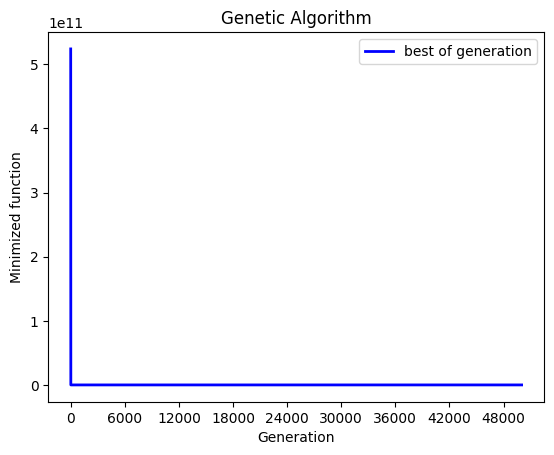

GAResult(last_generation=Generation(variables=array([[ 4973.32075718,  5025.36835149,  2995.72977119],
       [ 4973.32075718,  5025.36835149,  2995.72977119],
       [ 4973.32075718,  5025.36835149,  2995.72977119],
       [ 4967.95442667,  5025.36835149,  2995.72977119],
       [ 4927.63852187,  5025.36835149,  2995.72977119],
       [ 4973.32075718,  7801.64414685,  1163.25732104],
       [ 4973.32075718,  5781.20825615,  2995.72977119],
       [ 6135.55897094,  5025.36835149,  2995.72977119],
       [ 4973.32075718,  5025.36835149,  6686.02338737],
       [ 4973.32075718,  5025.36835149,  6686.02338737],
       [12151.41164079,  5025.36835149,  2995.72977119],
       [12151.41164079,  5025.36835149,  2995.72977119],
       [12151.41164079,  5025.36835149,  2995.72977119],
       [ 4927.63852187, 12550.51202604,  2995.72977119],
       [16337.80140337,  5025.36835149,  2995.72977119],
       [ 5635.2551661 ,  5025.36835149,  9692.12955408],
       [ 5950.2597271 ,  5025.36835149,  9

In [ ]:
from geneticalgorithm2 import geneticalgorithm2 as ga2
last_generation = np.array([])

def f_3(x):                # x[0]=K     x[1]=S     x[2]=L

    pen = 0
    fun = 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)
    # if (0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0:
    #     pen = 100000 + 200000*(1000 - (0.06*x[0] + 0.08*x[1] + 0.1*x[2]))   # Штрафуем если 0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0
    if (0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0:
      pen = -200000*np.power(((0.06*x[0] + 0.08*x[1] + 0.1*x[2]) - 1000),2)
    return (fun + pen)

algorithm_param = {'max_num_iteration': 50000,
                   'population_size':100,
                   'mutation_probability': 0.5,
                   'mutation_discrete_probability': None,
                   'elit_ratio': 0.01,
                   'parents_portion': 0.1,
                   'crossover_type':'uniform',
                   'mutation_type': 'uniform_by_center',
                   'mutation_discrete_type': 'uniform_discrete',
                   'selection_type': 'roulette',
                   'max_iteration_without_improv':None}

varbound=np.array([[0,100000], [0,100000], [0,100000]])

model=ga2(lambda x: -f_3(x), dimension=3,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

result_GA = model.run(no_plot=False, function=lambda x: -f_3(x), studEA = True)
result_GA

In [ ]:
result_GA.variable # x[0]=K     x[1]=S      x[2]=L

array([4973.32075718, 5025.36835149, 2995.72977119])

In [ ]:
f_1000(result_GA.variable) # Проверка, сумма затрат 0.06*S + 0.08*K + 0.1*L должна быть равна 1000 тыс.руб

1000.0016906691731

In [ ]:
print("Максимальная выручка в случае генетического алгоритма", f(result_GA.variable), "руб")

Максимальная выручка в случае генетического алгоритма 643432.7331894506 руб


**Проведем серию из 10 запусков генетического алгоритма для статического анализа**

In [ ]:
stat_GA = []
stat_time_GA = []
for run in range(10):
  print(f"#{run+1}")
  start = time.time()
  algorithm_param = {'max_num_iteration': 50000,
                    'population_size': 100,
                    'mutation_probability': 0.35,
                    'mutation_discrete_probability': None,
                    'elit_ratio': 0.01,
                    'parents_portion': 0.1,
                    'crossover_type':'uniform',
                    'mutation_type': 'uniform_by_center',
                    'mutation_discrete_type': 'uniform_discrete',
                    'selection_type': 'roulette',
                    'max_iteration_without_improv':None}
  varbound=np.array([[0,100000], [0,100000], [0,100000]])
  model=ga2(lambda x: -f_3(x), dimension=3,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param)
  result_GA = model.run(no_plot=True, function=lambda x: -f_3(x), studEA = True)
  finish = time.time()
  time_GA = finish - start
  stat_GA.append(f(result_GA.variable))
  stat_time_GA.append(time_GA)

#1

Set: Average time of function evaluating (secs): 1.5077590942382813e-05 (total = 0.0015077590942382812)

Best score before optimization: 183683147954.2986
                                                                                                                                                                                                        
 The best found solution:
 [4983.81934765 4988.87088515 3018.62677392]

 Objective function:
 -643433.0590071229

 Used generations: 50000
 Used time: 295 seconds
#2

Set: Average time of function evaluating (secs): 1.555919647216797e-05 (total = 0.0015559196472167969)

Best score before optimization: 1154101017346.5012
                                                                                                                                                                                                        
 The best found solution:
 [5035.01900544 4938.27576921 3028.3840076 ]

 Objective function:
 -643405.3462711747

 Us

In [ ]:
stat_GA

[643433.5144617389,
 643405.8599511241,
 643189.5787524604,
 643423.159981459,
 643386.2339126036,
 643188.6491809557,
 642955.8504430496,
 643303.3305155585,
 643355.6240324185,
 643325.5108817368]

In [ ]:
stat_time_GA

[294.7666642665863,
 288.02709913253784,
 286.01441764831543,
 294.67444252967834,
 304.3215374946594,
 306.1066863536835,
 312.19795751571655,
 306.029452085495,
 344.65937757492065,
 300.3759882450104]

In [ ]:
print("Среднее время поиска максимума генетическим алгоритмом:", np.mean(stat_time_GA), "сек")
print("Средняя максимальная выручка в случае генетического алгоритма", np.mean(stat_GA), "руб")

Среднее время поиска максимума генетическим алгоритмом: 303.71736228466034 сек
Средняя максимальная выручка в случае генетического алгоритма 643296.7312113105 руб


## 3. IPOPT - оптимизатор внутренних точек

In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [ ]:
x_bounds = [(0, np.inf)] * 3

x0 = [np.random.randint(0,10000) for i in range(3)]

# объявление объекта - модели
model = pyo.ConcreteModel('model')

# задаем переменные, в данном случае они все непрерывные, инициализируем случайными значениями
model.K = pyo.Var(bounds=(0, np.inf), initialize=x0[0])
model.S = pyo.Var(bounds=(0, np.inf), initialize=x0[1])
model.L = pyo.Var(bounds=(0, np.inf), initialize=x0[2])

# объявление целевой
fun_ipopt = 150*np.power(model.K,0.3)*np.power(model.S,0.4)*np.power(model.L,0.3)
model.fun = pyo.Objective(expr=fun_ipopt, sense=pyo.maximize)

# объявление ограничения и передача в модель
cons_expr = 0.06*model.K + 0.08*model.S + 0.1*model.L == 1000
model.con = pyo.Constraint(expr=cons_expr)

# запуск солвера ipopt для решения поставленной оптимизационной задачи
solver = pyo.SolverFactory('ipopt')
solver.solve(model)

# получение ответа - результата решения задачи
x_IPOPT = model.K.value, model.S.value, model.L.value
x_IPOPT # x[0]=K     x[1]=S      x[2]=L

(5000.0000000000055, 4999.999999999991, 3000.000000000004)

In [ ]:
model.display()

Model model

  Variables:
    K : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 5000.0000000000055 :  None : False : False :  Reals
    S : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 4999.999999999991 :  None : False : False :  Reals
    L : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 3000.000000000004 :  None : False : False :  Reals

  Objectives:
    fun : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 643437.9003330712

  Constraints:
    con : Size=1
        Key  : Lower  : Body   : Upper
        None : 1000.0 : 1000.0 : 1000.0


In [ ]:
model.fun()
print("Максимальная выручка в случае IPOPT", model.fun(), "руб")

Максимальная выручка в случае IPOPT 643437.9003330712 руб


In [ ]:
f_1000(x_IPOPT)  # Проверка, сумма затрат 0.06*S + 0.08*K + 0.1*L должна быть равна 1000 тыс.руб

1000.0

**Проведем серию из 10 запусков оптимизатора IPOPT для статического анализа**

In [ ]:
stat_IPOPT = []
stat_time_IPOPT = []
for run in range(10):
  x0 = [np.random.randint(0,10000) for i in range(3)]
  model = pyo.ConcreteModel('model')
  model.K = pyo.Var(bounds=(0, np.inf), initialize=x0[0])
  model.S = pyo.Var(bounds=(0, np.inf), initialize=x0[1])
  model.L = pyo.Var(bounds=(0, np.inf), initialize=x0[2])
  fun_ipopt = 150*np.power(model.K,0.3)*np.power(model.S,0.4)*np.power(model.L,0.3)
  model.fun = pyo.Objective(expr=fun_ipopt, sense=pyo.maximize)
  cons_expr = 0.06*model.K + 0.08*model.S + 0.1*model.L == 1000
  model.con = pyo.Constraint(expr=cons_expr)
  solver = pyo.SolverFactory('ipopt')
  start = time.time()
  solver.solve(model)
  finish = time.time()
  time_IPOPT = finish - start
  stat_IPOPT.append(model.fun())
  stat_time_IPOPT.append(time_IPOPT)

In [ ]:
stat_IPOPT

[643437.9003330711,
 643437.9003330711,
 643437.9003330711,
 643437.9003330711,
 643437.9003330712,
 643437.9003330711,
 643437.9003330711,
 643437.9003330711,
 643437.9003330711,
 643437.9003330712]

In [ ]:
stat_time_IPOPT

[0.02108931541442871,
 0.021677494049072266,
 0.019913911819458008,
 0.044263601303100586,
 0.029625892639160156,
 0.06835508346557617,
 0.10227251052856445,
 0.02832627296447754,
 0.02750253677368164,
 0.03048396110534668]

In [ ]:
print("Среднее время поиска максимума IPOPT:", np.mean(stat_time_IPOPT), "сек")
print("Средняя максимальная выручка в IPOPT", np.mean(stat_IPOPT), "руб")

Среднее время поиска максимума IPOPT: 0.03935105800628662 сек
Средняя максимальная выручка в IPOPT 643437.9003330711 руб


## 4. CMA-ES (Covariance Matrix Adaptation Evolution Strategy)  - алгоритм

In [ ]:
%%capture
!pip install optuna

In [ ]:
!pip install cmaes

In [ ]:
import optuna
import cmaes

In [ ]:
%%time
def objective(trial):
  K = trial.suggest_float('K', 0, 100000)
  S = trial.suggest_float('S', 0, 100000)
  L = trial.suggest_float('L', 0, 100000)
  fun = 150*np.power(K,0.3)*np.power(S,0.4)*np.power(L,0.3)
  pen = 0
  if (0.06*K + 0.08*S + 0.1*L-1000) > 0:
    pen = -100000 + 200000*(1000 - (0.06*K + 0.08*S + 0.1*L))
  # if (0.06*K + 0.08*S + 0.1*L-1000) > 0:
  #   pen = -200000*np.power(((0.06*K + 0.08*S + 0.1*L) - 1000),2)
  return (fun+pen)

study = optuna.create_study(study_name="max_profit", sampler=optuna.samplers.CmaEsSampler(), direction="maximize")
study.optimize(objective, n_trials=2000, n_jobs=-1)

print(study.best_params)

[I 2024-04-23 12:29:41,281] A new study created in memory with name: max_profit
[I 2024-04-23 12:29:41,289] Trial 0 finished with value: -1686377843.0272865 and parameters: {'K': 32551.358893295725, 'S': 3166.1944854321832, 'L': 72372.27832564317}. Best is trial 0 with value: -1686377843.0272865.
[I 2024-04-23 12:29:41,301] Trial 2 finished with value: -3083624425.986868 and parameters: {'K': 80873.4228546433, 'S': 71839.9198670016, 'L': 58705.70837163763}. Best is trial 0 with value: -1686377843.0272865.
[I 2024-04-23 12:29:41,303] Trial 1 finished with value: -1643662373.3841348 and parameters: {'K': 56208.925007068065, 'S': 20454.490191665576, 'L': 42347.61583677909}. Best is trial 1 with value: -1643662373.3841348.
[I 2024-04-23 12:29:41,313] Trial 3 finished with value: -2749144693.0674295 and parameters: {'K': 37993.52416368843, 'S': 75597.96117362715, 'L': 64617.78273550536}. Best is trial 1 with value: -1643662373.3841348.
[I 2024-04-23 12:29:41,318] Trial 4 finished with value

{'K': 4999.9999451633485, 'S': 5000.000082656401, 'L': 2999.9999667768675}
CPU times: user 14.2 s, sys: 451 ms, total: 14.6 s
Wall time: 16.2 s


In [ ]:
print(study.best_params)


{'K': 4999.9999451633485, 'S': 5000.000082656401, 'L': 2999.9999667768675}


In [ ]:
x_CMAES = list(study.best_params.values())
x_CMAES

[4999.9999451633485, 5000.000082656401, 2999.9999667768675]

In [ ]:
print("Максимальная выручка в случае IPOPT", f(x_CMAES), "руб")

Максимальная выручка в случае IPOPT 643437.9003330709 руб


In [ ]:
f_1000(x_CMAES)  # Проверка, сумма затрат 0.06*S + 0.08*K + 0.1*L должна быть равна 1000 тыс.руб

999.9999999999998

**Проведем серию из 10 запусков оптимизатора CMA-ES для статического анализа**





In [ ]:
stat_CMAES = []
stat_time_CMAES = []
for run in range(10):
  print(f"#{run+1}")
  start = time.time()
  study = optuna.create_study(study_name="max_profit",
                              sampler=optuna.samplers.CmaEsSampler(),
                              direction="maximize")
  study.optimize(objective, n_trials=2500, n_jobs=-1)
  x_CMAES = list(study.best_params.values())
  finish = time.time()
  time_CMAES = finish - start
  stat_CMAES.append(f(x_CMAES))
  stat_time_CMAES.append(time_CMAES)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
stat_CMAES

[643437.9003330714,
 643437.9003330711,
 643437.9003330704,
 643437.9003330714,
 643437.9003330714,
 643437.9003330714,
 643437.9003330714,
 643437.9003330714,
 643437.9003330712,
 643437.9003330712]

In [ ]:
stat_time_CMAES

[21.095345973968506,
 21.75194501876831,
 21.776082277297974,
 21.929704904556274,
 21.70412302017212,
 22.04918646812439,
 21.752501487731934,
 21.584989309310913,
 21.54769802093506,
 21.80980920791626]

In [ ]:
print("Среднее время поиска максимума CMAES:", np.mean(stat_time_CMAES), "сек")
print("Средняя максимальная выручка в случае CMAES", np.mean(stat_CMAES), "руб")

Среднее время поиска максимума CMAES: 21.700138568878174 сек
Средняя максимальная выручка в случае CMAES 643437.9003330712 руб


## Сравнение методов по среднему времени поиска максимума и средней максимальной выручки

In [ ]:
%%capture
!pip install dataframe_image

In [ ]:
%%capture
!pip install selenium
import dataframe_image as dfi

In [ ]:
df_stat = pd.DataFrame([stat_SLSQP, stat_GA, stat_IPOPT, stat_CMAES], index=["SLSQP", "GA", "IPOPT", "CMA-ES"]).transpose()
df_stat

SLSQP             GA          IPOPT         CMA-ES
0  643437.900333  643433.514462  643437.900333  643437.900333
1  643437.900333  643405.859951  643437.900333  643437.900333
2  643437.900333  643189.578752  643437.900333  643437.900333
3  643437.900333  643423.159981  643437.900333  643437.900333
4  643437.900333  643386.233913  643437.900333  643437.900333
5  643437.900333  643188.649181  643437.900333  643437.900333
6  643437.900333  642955.850443  643437.900333  643437.900333
7  643437.900333  643303.330516  643437.900333  643437.900333
8  643437.900333  643355.624032  643437.900333  643437.900333
9  643437.900333  643325.510882  643437.900333  643437.900333

In [ ]:
df_stat_time = pd.DataFrame([stat_time_SLSQP, stat_time_GA, stat_time_IPOPT, stat_time_CMAES], index=["SLSQP", "GA", "IPOPT", "CMA-ES"]).transpose()
df_stat_time

SLSQP          GA     IPOPT     CMA-ES
0  0.005397  294.766664  0.021089  21.095346
1  0.011299  288.027099  0.021677  21.751945
2  0.009212  286.014418  0.019914  21.776082
3  0.004890  294.674443  0.044264  21.929705
4  0.006688  304.321537  0.029626  21.704123
5  0.003904  306.106686  0.068355  22.049186
6  0.007482  312.197958  0.102273  21.752501
7  0.007712  306.029452  0.028326  21.584989
8  0.006775  344.659378  0.027503  21.547698
9  0.005825  300.375988  0.030484  21.809809

In [ ]:
df_time_profit = df_stat_time.transpose()
df_time_profit['Среднее время, сек'] = df_stat_time.transpose().mean(axis=1, numeric_only=True)
df_time_profit['Средняя макс выручка, р'] = df_stat.transpose().mean(axis=1, numeric_only=True)
df_time_profit = df_time_profit.drop(columns=[0,1,2,3,4,5,6,7,8,9], axis=1)
df_time_profit

Среднее время, сек  Средняя макс выручка, р
SLSQP             0.006918            643437.900333
GA              303.717362            643296.731211
IPOPT             0.039351            643437.900333
CMA-ES           21.700139            643437.900333

Как видим средняя максимальная выручка отличается только у GA. Остальные методы показывают одинаковый результат. Самый быстрый метод  SLSQP, самый медленный GA

In [ ]:
df_time_profit_styled = df_time_profit.style.background_gradient()
dfi.export(df_time_profit_styled, "df_time_profit.png", table_conversion='selenium')

## BoxPlot

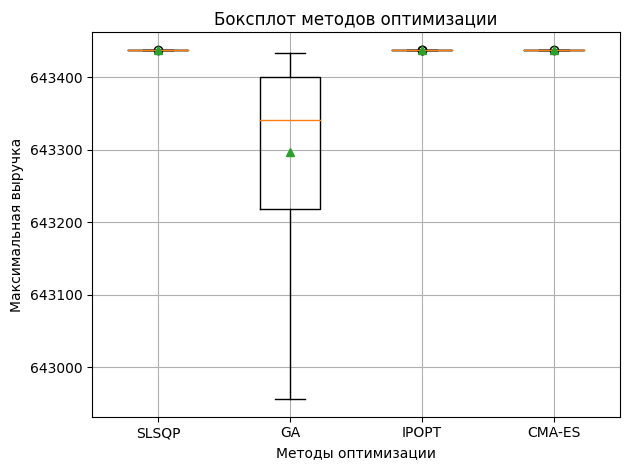

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df_stat, showmeans=True, labels=["SLSQP", "GA", "IPOPT", "CMA-ES"])
plt.grid()
plt.title("Боксплот методов оптимизации")
plt.ylabel("Максимальная выручка")
plt.xlabel("Методы оптимизации")
plt.tight_layout()
plt.savefig("plt4.png", format="png")
plt.show()

Как видим, боксплот методов также показывает что у GA средняя максимальная вырычка отличается от всех методов. Также GA имеет большой разброс.

Посмотрим на результаты методов без учета GA

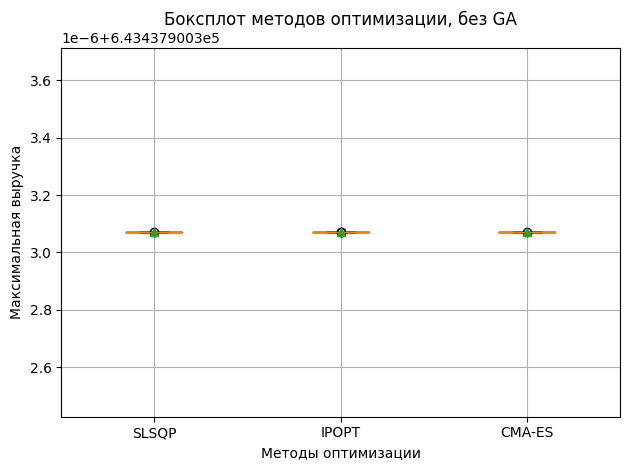

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df_stat[["SLSQP", "IPOPT", "CMA-ES"]], showmeans=True, labels=["SLSQP", "IPOPT", "CMA-ES"])
plt.grid()
plt.title("Боксплот методов оптимизации, без GA")
plt.ylabel("Максимальная выручка")
plt.xlabel("Методы оптимизации")
plt.tight_layout()
plt.savefig("plt3.png", format="png")
plt.show()

Как видим без GA методы показывают одинаковые результаты

## Friedman Test, Nemenyi test

In [ ]:
from scipy import stats

Тест Фридмана используется для того, чтобы определить, существует ли значимая разница между средними более чем двух групп.

**Нулевая гипотеза (H0)**: среднее значение для каждой из популяций одинаково. \
**Альтернативная гипотеза: (Ха)**: По крайней мере одно среднее значение генеральной совокупности отличается от остальных.

In [ ]:
stats.friedmanchisquare(stat_SLSQP, stat_GA, stat_IPOPT, stat_CMAES)

FriedmanchisquareResult(statistic=23.340659340659318, pvalue=3.4290429698258195e-05)

Как видим тестовая статистика равна 23.34065, а соответствующее p-value равно 0.00003429. Поскольку p-value меньше 0.05, мы отвергаем нулевую гипотезу (H0) о том, что средняя максимальная выручка для всех алгоритмов одинаковая.
Проще говоря, у нас есть достаточно доказательств, чтобы утверждать, что методы оптимизации приводят к статистически значимым различиям в результатах средней максимальной выручки и по крайней мере одно среднее значение генеральной совокупности отличается от остальных.

Проведем тест Немени, чтобы точно определить, какие методы отличаются друг от друга (имеют разные средние значения маскимальной выручки).

In [ ]:
%%capture
!pip install scikit-posthocs

Тест Немени выдает p-value для каждого парного сравнения средних

In [ ]:
from scipy import stats
import scikit_posthocs as sp
df_stat_nemenyi_friedman = sp.posthoc_nemenyi_friedman(df_stat)
df_stat_nemenyi_friedman


SLSQP        GA     IPOPT    CMA-ES
SLSQP   1.000000  0.017062  0.900000  0.403706
GA      0.017062  1.000000  0.017062  0.001000
IPOPT   0.900000  0.017062  1.000000  0.403706
CMA-ES  0.403706  0.001000  0.403706  1.000000

Как видим из таблицы парного сравнения p-value, при $\alpha =0.05$ статически значимо отличаются друг от друга: SLSQP и GA (их p-value меньше 0.05), а также GA и IPOPT, GA и CMA-ES. Наибольшее сходство методы имеют сами с собой, поэтомы по дигонали единички. Так как GA статически значимо отличается от всех методов делаем вывод что максимальная средняя выручка от GA не корректна и требует настройки работы GA и/или увеличения количество итераций GA.
Так три разных метода независимо показали и сошлись к одинаковому результату считаем правильным решение задачи поиска максимальной выручки, равной 643437.9003330711руб при следующих парметрах:

K=5000 тыс.руб \
S=5000 тыс.руб \
L=3000 тыс.руб \

In [ ]:
df_stat_nemenyi_friedman_styled = df_stat_nemenyi_friedman.style.background_gradient()
dfi.export(df_stat_nemenyi_friedman_styled, "df_stat_nemenyi_friedman.png", table_conversion='selenium')